# ***Libraries***

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# ***Loading Data***

In [26]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [27]:
telecom.shape

(99999, 226)

We assume that there are three phases of customer lifecycle :

- The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

- The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

- The ‘churn’ phase: In this phase, the customer is said to have churned. We define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, we discard all data corresponding to this phase.

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


# ***High Value Customers***

High-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).


In [28]:
telecom['total_rech_data_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_rech_data_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_rech_data_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']
telecom['total_rech_data_amt_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']

In [29]:
telecom.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9', 
                        'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace =True)

In [30]:
telecom.shape

(99999, 222)

In [31]:
good_phase_average_rech_amt = (telecom['total_rech_amt_6'].fillna(0) + telecom['total_rech_amt_7'].fillna(0) + 
                       telecom['total_rech_data_amt_6'].fillna(0) + telecom['total_rech_data_amt_7'].fillna(0))/2

In [32]:
gd_phase_avg_rech_amt_70 = np.percentile(good_phase_average_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {gd_phase_avg_rech_amt_70}')

70 Percentile of recharge amount is : 478.0


In [33]:
telecom_hv_cust = telecom[good_phase_average_rech_amt >= gd_phase_avg_rech_amt_70]

print(f'Shape of high value customer data: {telecom_hv_cust.shape}')

Shape of high value customer data: (30001, 222)


# ***Churn Column***

The churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9



In [34]:
churn_tag_columns = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
telecom_hv_cust['churn'] = np.where(telecom_hv_cust.loc[:,churn_tag_columns].sum(axis=1) == 0, 1,0)
telecom_hv_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,NaN,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,315,21.03,910.65,122.16,0.00,NaN,354.0,207.0,NaN,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,720,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,604,40.45,51.86,0.00,0.00,NaN,712.0,540.0,252.0,0


# ***Data Cleaning***

In [35]:
# Dropping columsn with constant values
columns_with_const_value = [e for e in telecom_hv_cust.columns if telecom_hv_cust[e].nunique() == 1]
telecom_hv_cust = telecom_hv_cust.drop(labels = columns_with_const_value,axis = 1)
telecom_hv_cust.shape

(30001, 207)

## ***Handling Missing values***

In [36]:
# Checking for missing values

missing_val = (telecom_hv_cust.isna().sum() / telecom_hv_cust.shape[0] * 100).sort_values(ascending= False)
missing_val

arpu_3g_9                   49.268358
fb_user_9                   49.268358
date_of_last_rech_data_9    49.268358
max_rech_data_9             49.268358
count_rech_2g_9             49.268358
                              ...    
max_rech_amt_8               0.000000
max_rech_amt_7               0.000000
max_rech_amt_6               0.000000
total_rech_amt_9             0.000000
churn                        0.000000
Length: 207, dtype: float64

In [37]:
# Dropping any columns with missing values > 30%

cols = telecom_hv_cust.columns
telecom_null_perc = telecom_hv_cust.isnull().sum() * 100 / len(telecom_hv_cust)
telecom_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_null_perc})

drop_cols = telecom_null_df.loc[(telecom_null_df["col_name"].str.contains('_9')==False) & (telecom_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",drop_cols)

# lets drop these columns
telecom_hv_cust.drop(drop_cols, axis=1,inplace = True)
telecom_hv_cust.shape

list of columns dropped: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6     

(30001, 180)

In [38]:
# lets check for columns that can be changed to integers, floats or date types
object_col_data = telecom_hv_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


In [39]:
# convert to datetime
for col in object_col_data.columns:
    telecom_hv_cust[col] = pd.to_datetime(telecom_hv_cust[col])

telecom_hv_cust.shape

(30001, 180)

In [40]:
# check the correlation amongst the features, drop the highly correlated ones
corr = telecom_hv_cust.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7                 arpu_6             0.671732
arpu_8                 arpu_6             0.612617
                       arpu_7             0.759858
arpu_9                 arpu_7             0.683613
                       arpu_8             0.797102
                                            ...   
jul_vbc_3g             vol_3g_mb_7        0.628183
                       aug_vbc_3g         0.697279
jun_vbc_3g             vol_3g_mb_6        0.623533
                       jul_vbc_3g         0.667316
total_rech_data_amt_9  count_rech_3g_9    0.646227
Length: 337, dtype: float64

In [41]:
# we will drop the columns with high correlation (+/- 60%)
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

telecom_hv_cust = telecom_hv_cust.drop(drop_col_list, axis=1)
telecom_hv_cust.shape

(30001, 125)

In [42]:
# Now we will delete 9th month columns because we would predict churn/non-churn later based on data from the 1st 3 months
cols_to_drop = [col for col in telecom_hv_cust.columns if '_9' in col]
print(cols_to_drop)

telecom_hv_cust.drop(cols_to_drop, axis=1, inplace=True)

telecom_hv_cust.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']


(30001, 88)

In [43]:
# Checking for missing values

missing_val = (telecom_hv_cust.isna().sum() / telecom_hv_cust.shape[0] * 100).sort_values(ascending= False)
missing_val

loc_og_t2c_mou_8      3.913203
roam_ic_mou_8         3.913203
spl_og_mou_8          3.913203
isd_og_mou_8          3.913203
std_og_mou_8          3.913203
                        ...   
last_day_rch_amt_7    0.000000
last_day_rch_amt_8    0.000000
vol_2g_mb_6           0.000000
vol_2g_mb_7           0.000000
churn                 0.000000
Length: 88, dtype: float64

In [44]:
telecom_hv_cust = telecom_hv_cust.dropna()

telecom_hv_cust.shape

(28504, 88)

In [45]:
missing_val = (telecom_hv_cust.isna().sum() / telecom_hv_cust.shape[0] * 100).sort_values(ascending= False)
missing_val

mobile_number         0.0
arpu_6                0.0
last_day_rch_amt_6    0.0
max_rech_amt_8        0.0
max_rech_amt_7        0.0
                     ... 
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2f_mou_8      0.0
churn                 0.0
Length: 88, dtype: float64

# ***EDA***

## ***Class Imblance***

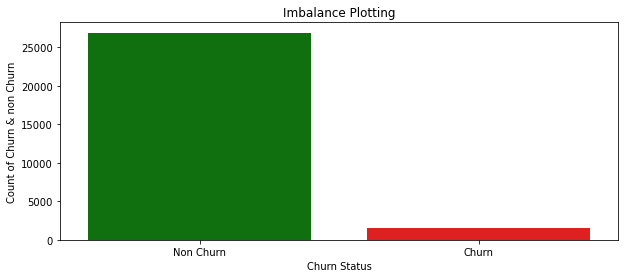

In [46]:
# Imbalance 


Imbalance = telecom_hv_cust['churn'].value_counts().reset_index()

plt.figure(figsize=(10,4))
x = ['Non Churn','Churn']
sns.barplot(x = x, y = "churn",data = Imbalance,palette= ['g','r'])
plt.xlabel("Churn Status")
plt.ylabel("Count of Churn & non Churn")
plt.title("Imbalance Plotting")
plt.show()

## ***Helper Function***

In [47]:
#  function to plot historgram for some sample columns
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [48]:
# function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna(axis ='columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [49]:
# function to plot scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
   
    df = df.dropna(axis ='columns')
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

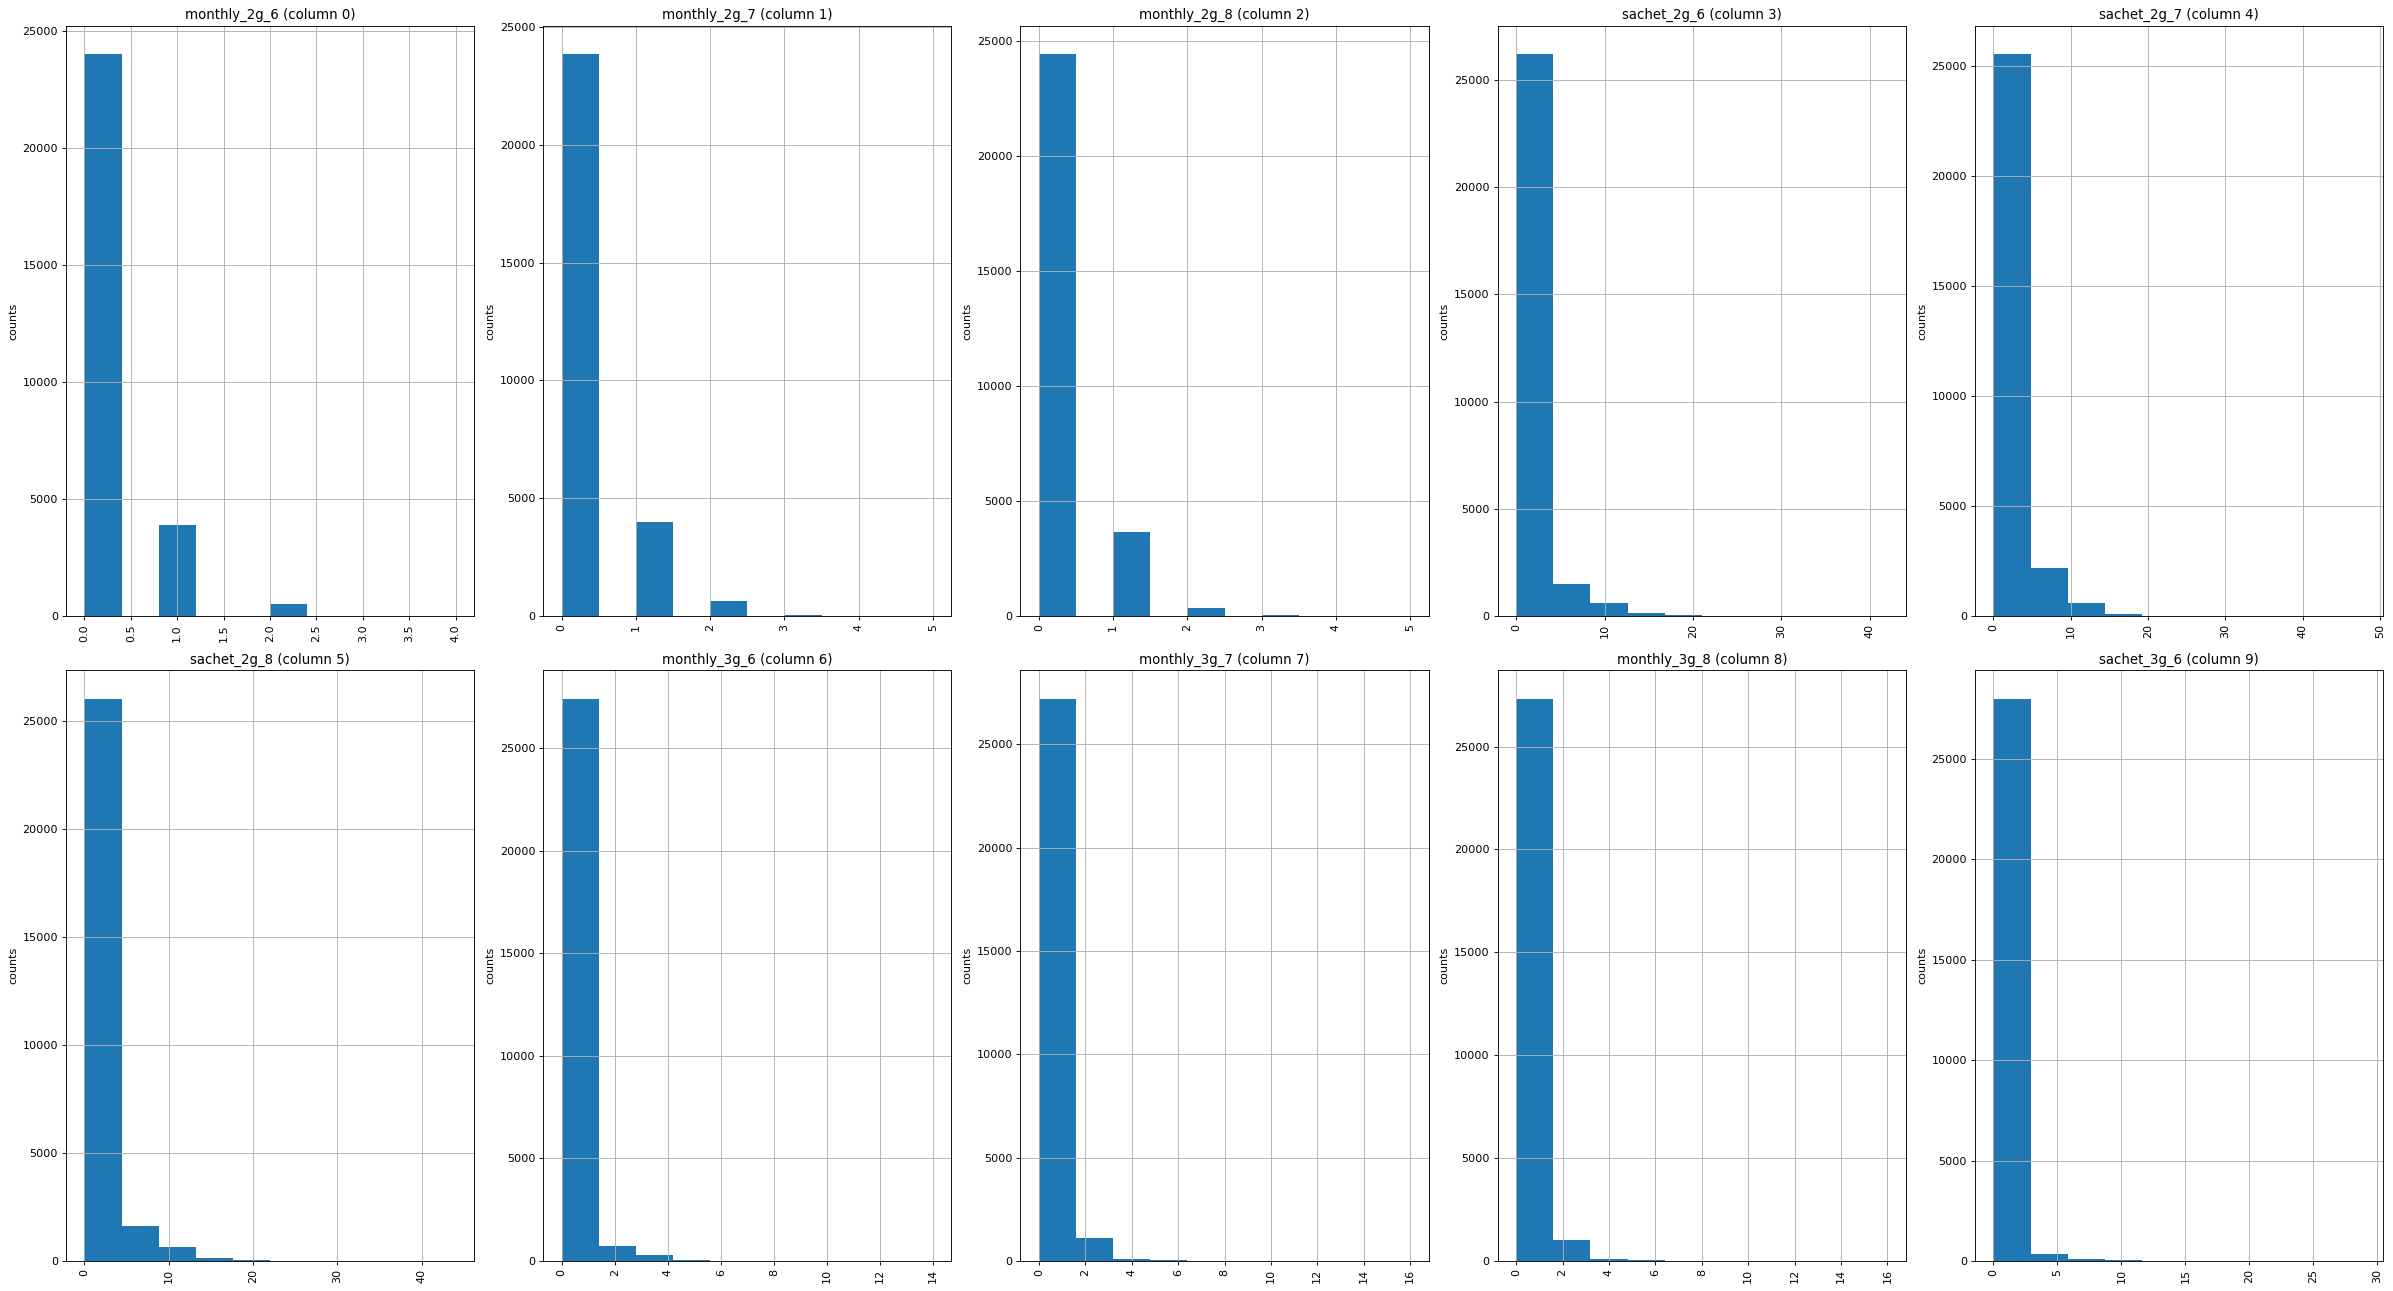

In [ ]:
plotPerColumnDistribution(telecom_hv_cust, 10, 5)

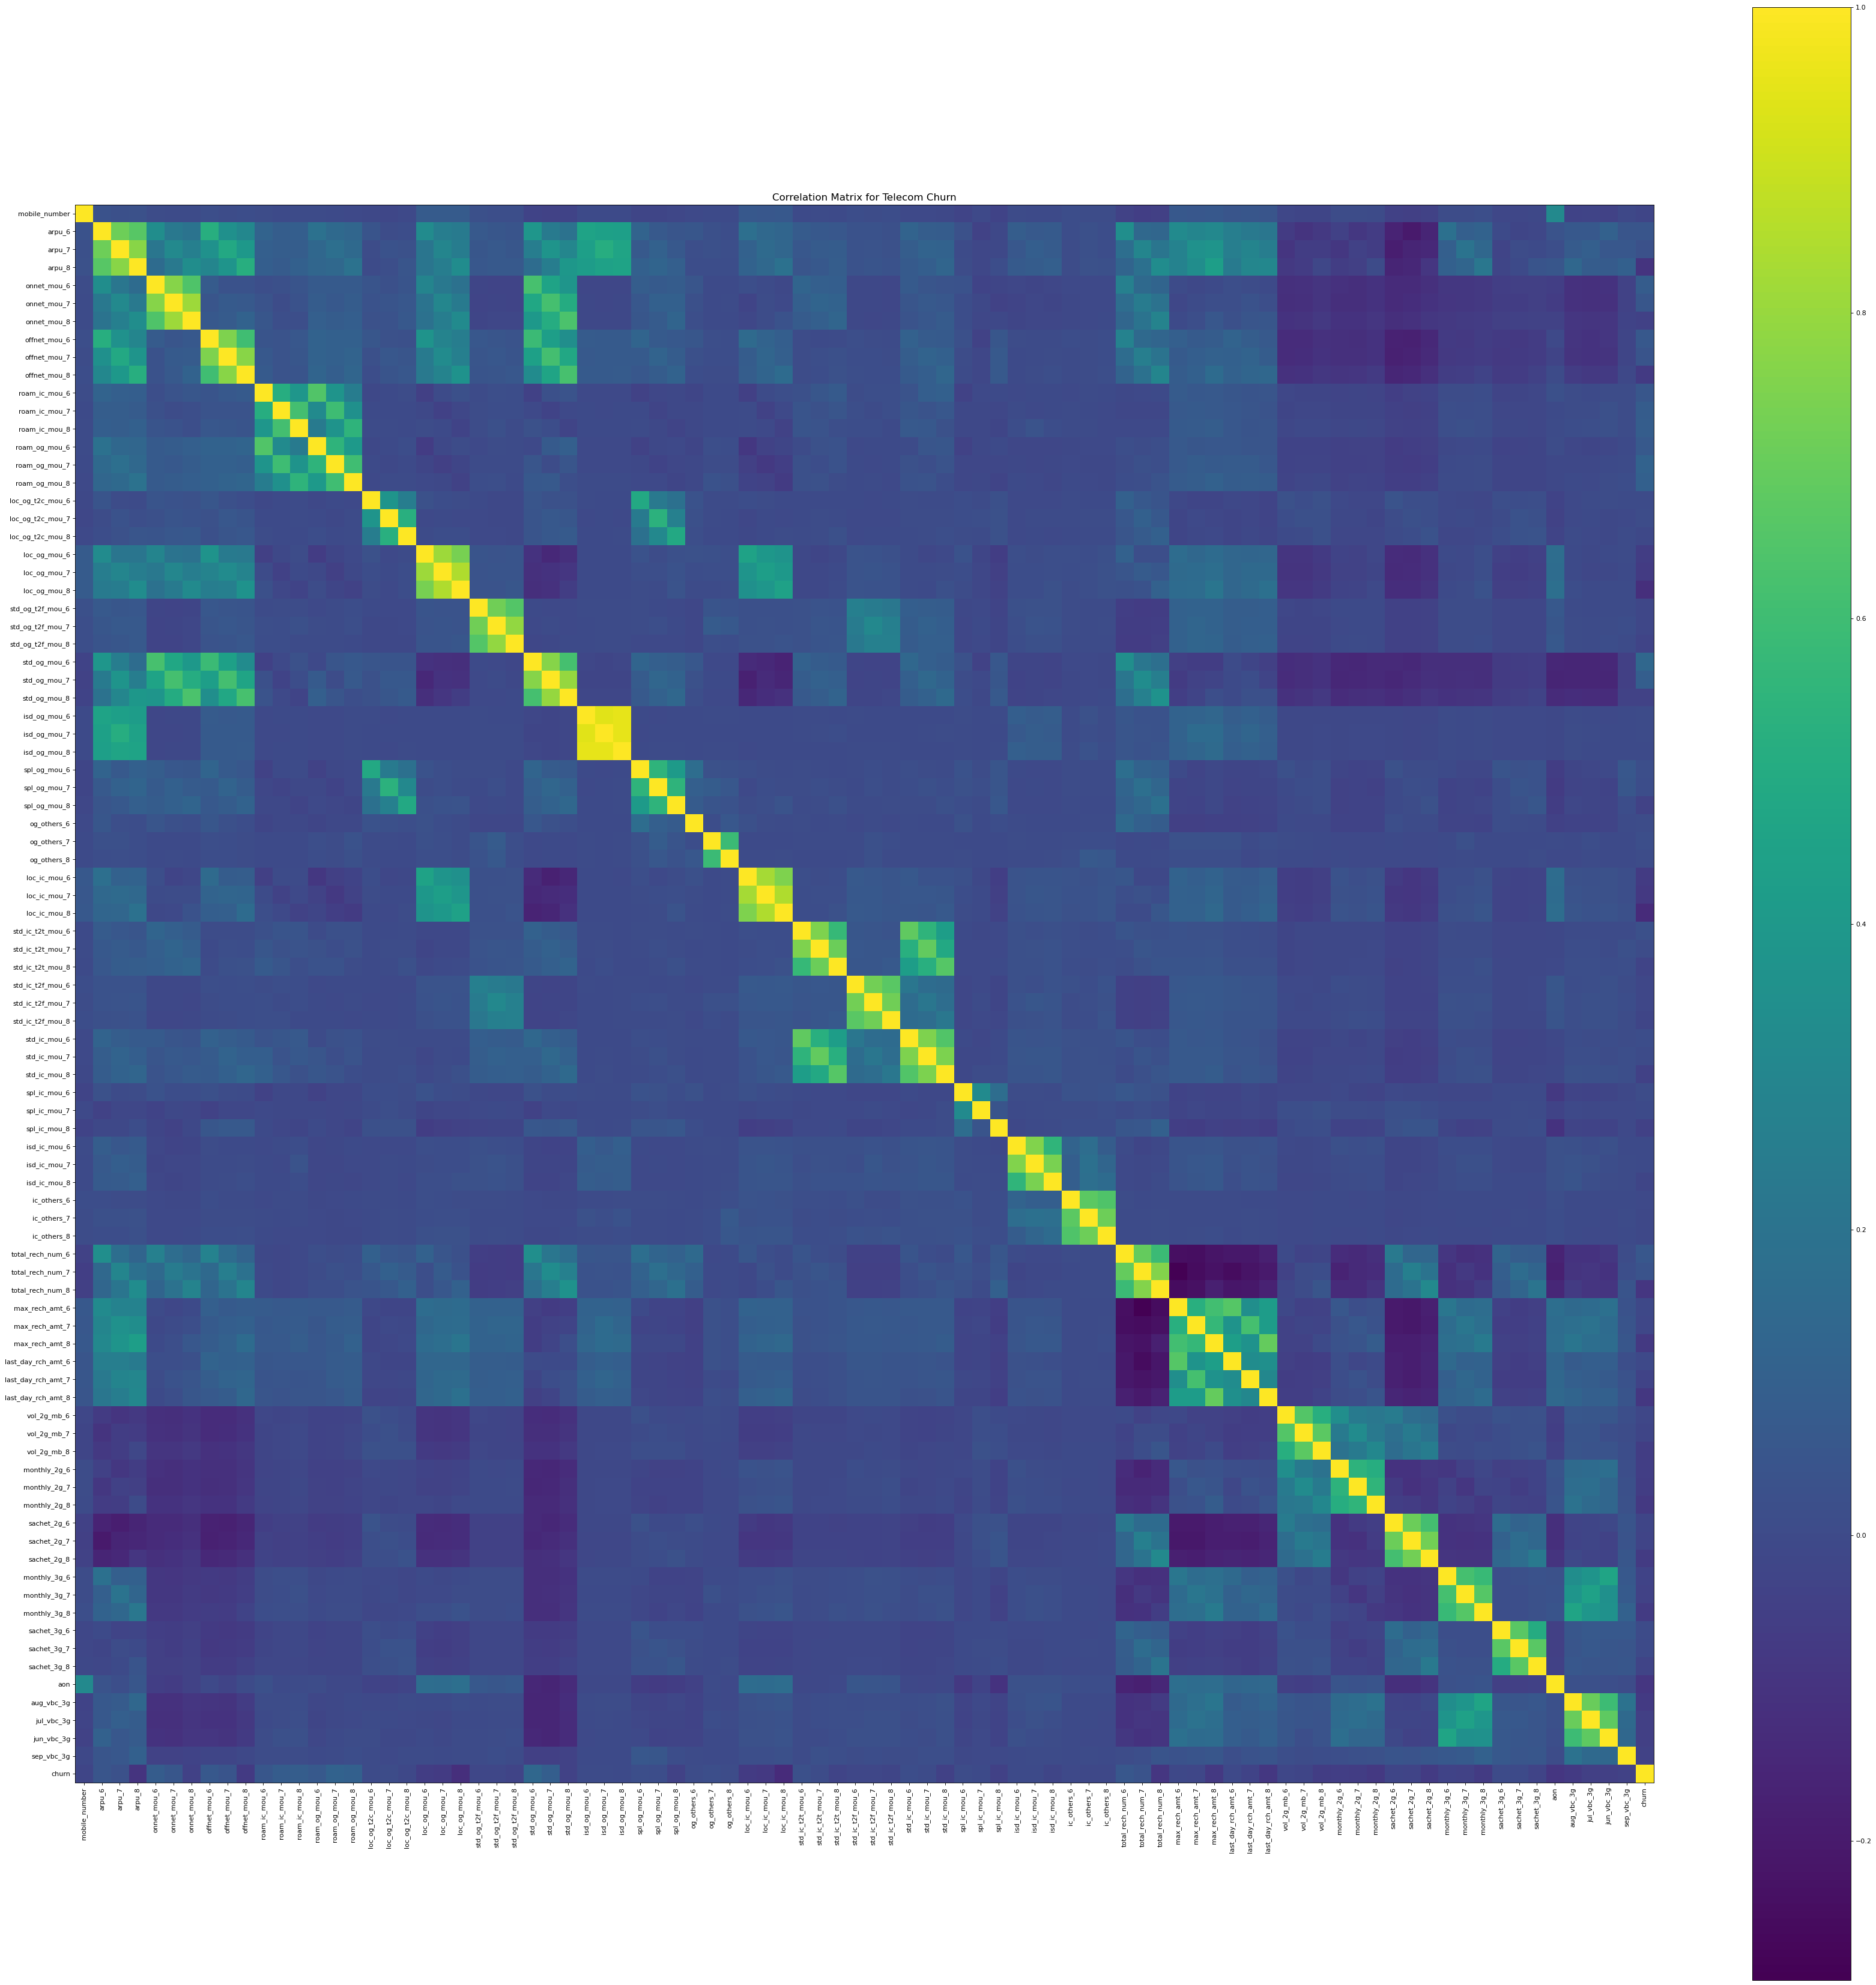

In [ ]:
plotCorrelationMatrix(telecom_hv_cust, 53)

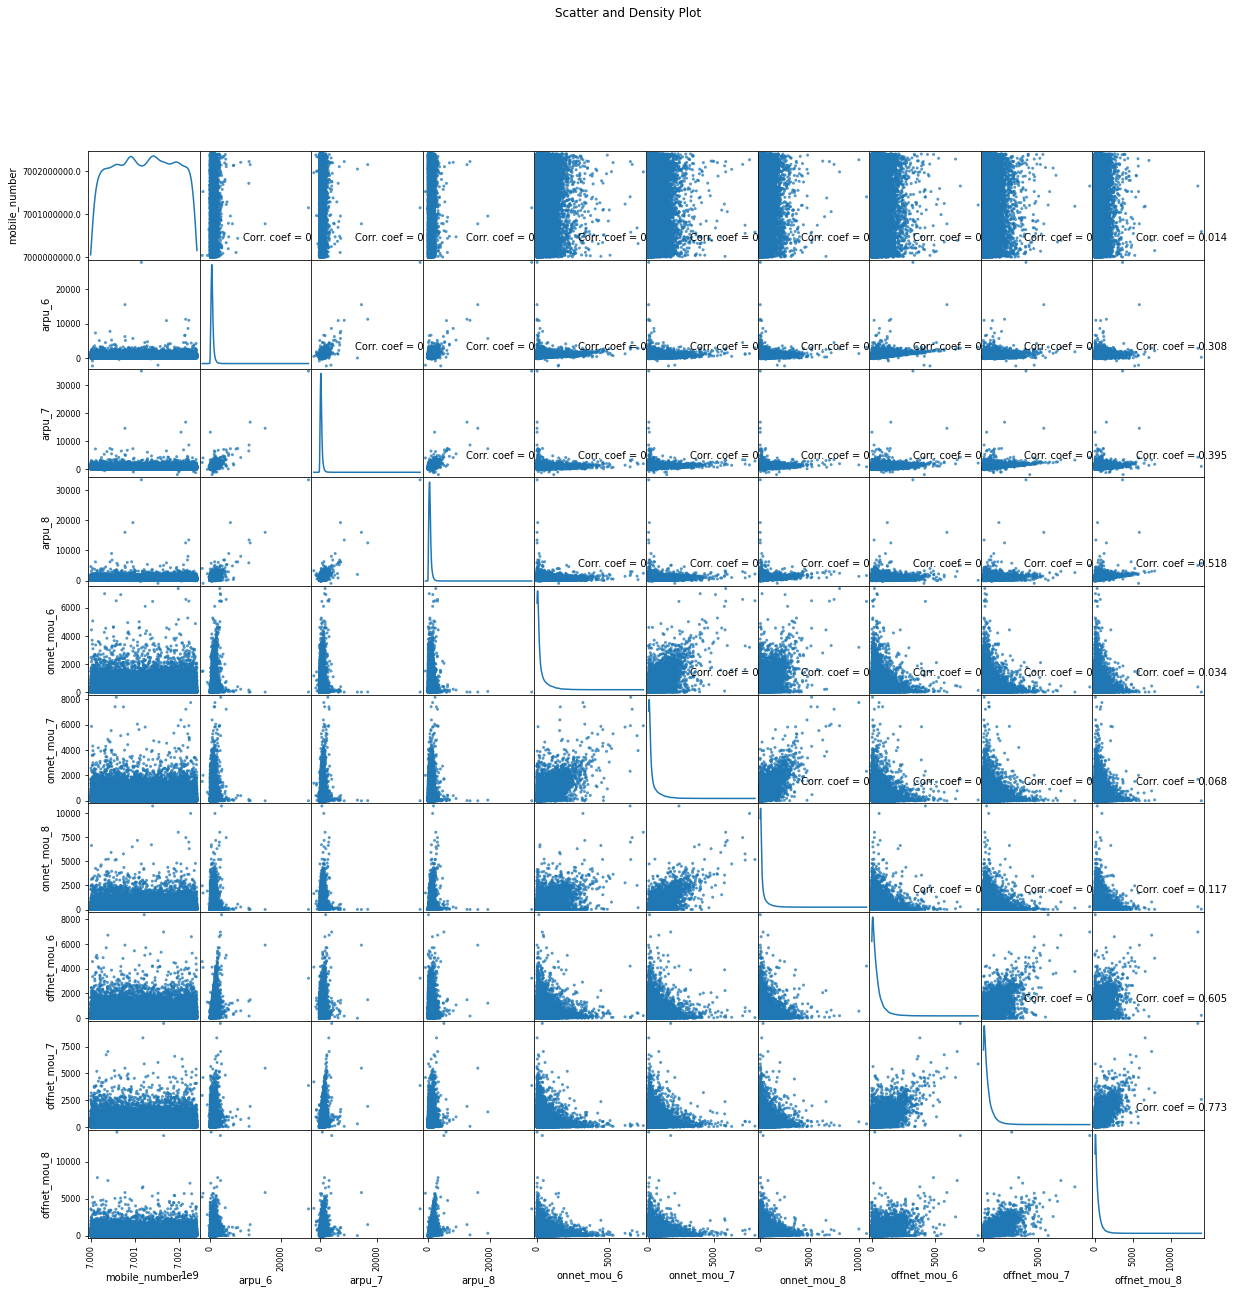

In [52]:
plotScatterMatrix(telecom_hv_cust, 20, 10)

## ***Feature Engineering***

In [53]:
# create a new colulmn, which would be average  of 6th & 7th months

col_list = telecom_hv_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (telecom_hv_cust.shape)

# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_hv_cust[avg_col_name] = (telecom_hv_cust[col_6]  + telecom_hv_cust[col_7])/ 2


(28504, 88)


In [54]:
print('Before: ',telecom_hv_cust.shape)
col_to_drop = telecom_hv_cust.filter(regex='_6|_7').columns
telecom_hv_cust.drop(col_to_drop, axis=1, inplace=True)
print('After: ',telecom_hv_cust.shape)

Before:  (28504, 115)
After:  (28504, 61)


In [55]:
# lets now conevrt AON in months
telecom_hv_cust['aon_mon'] = telecom_hv_cust['aon']/30
telecom_hv_cust.drop('aon', axis=1, inplace=True)
telecom_hv_cust['aon_mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_mon, dtype: float64

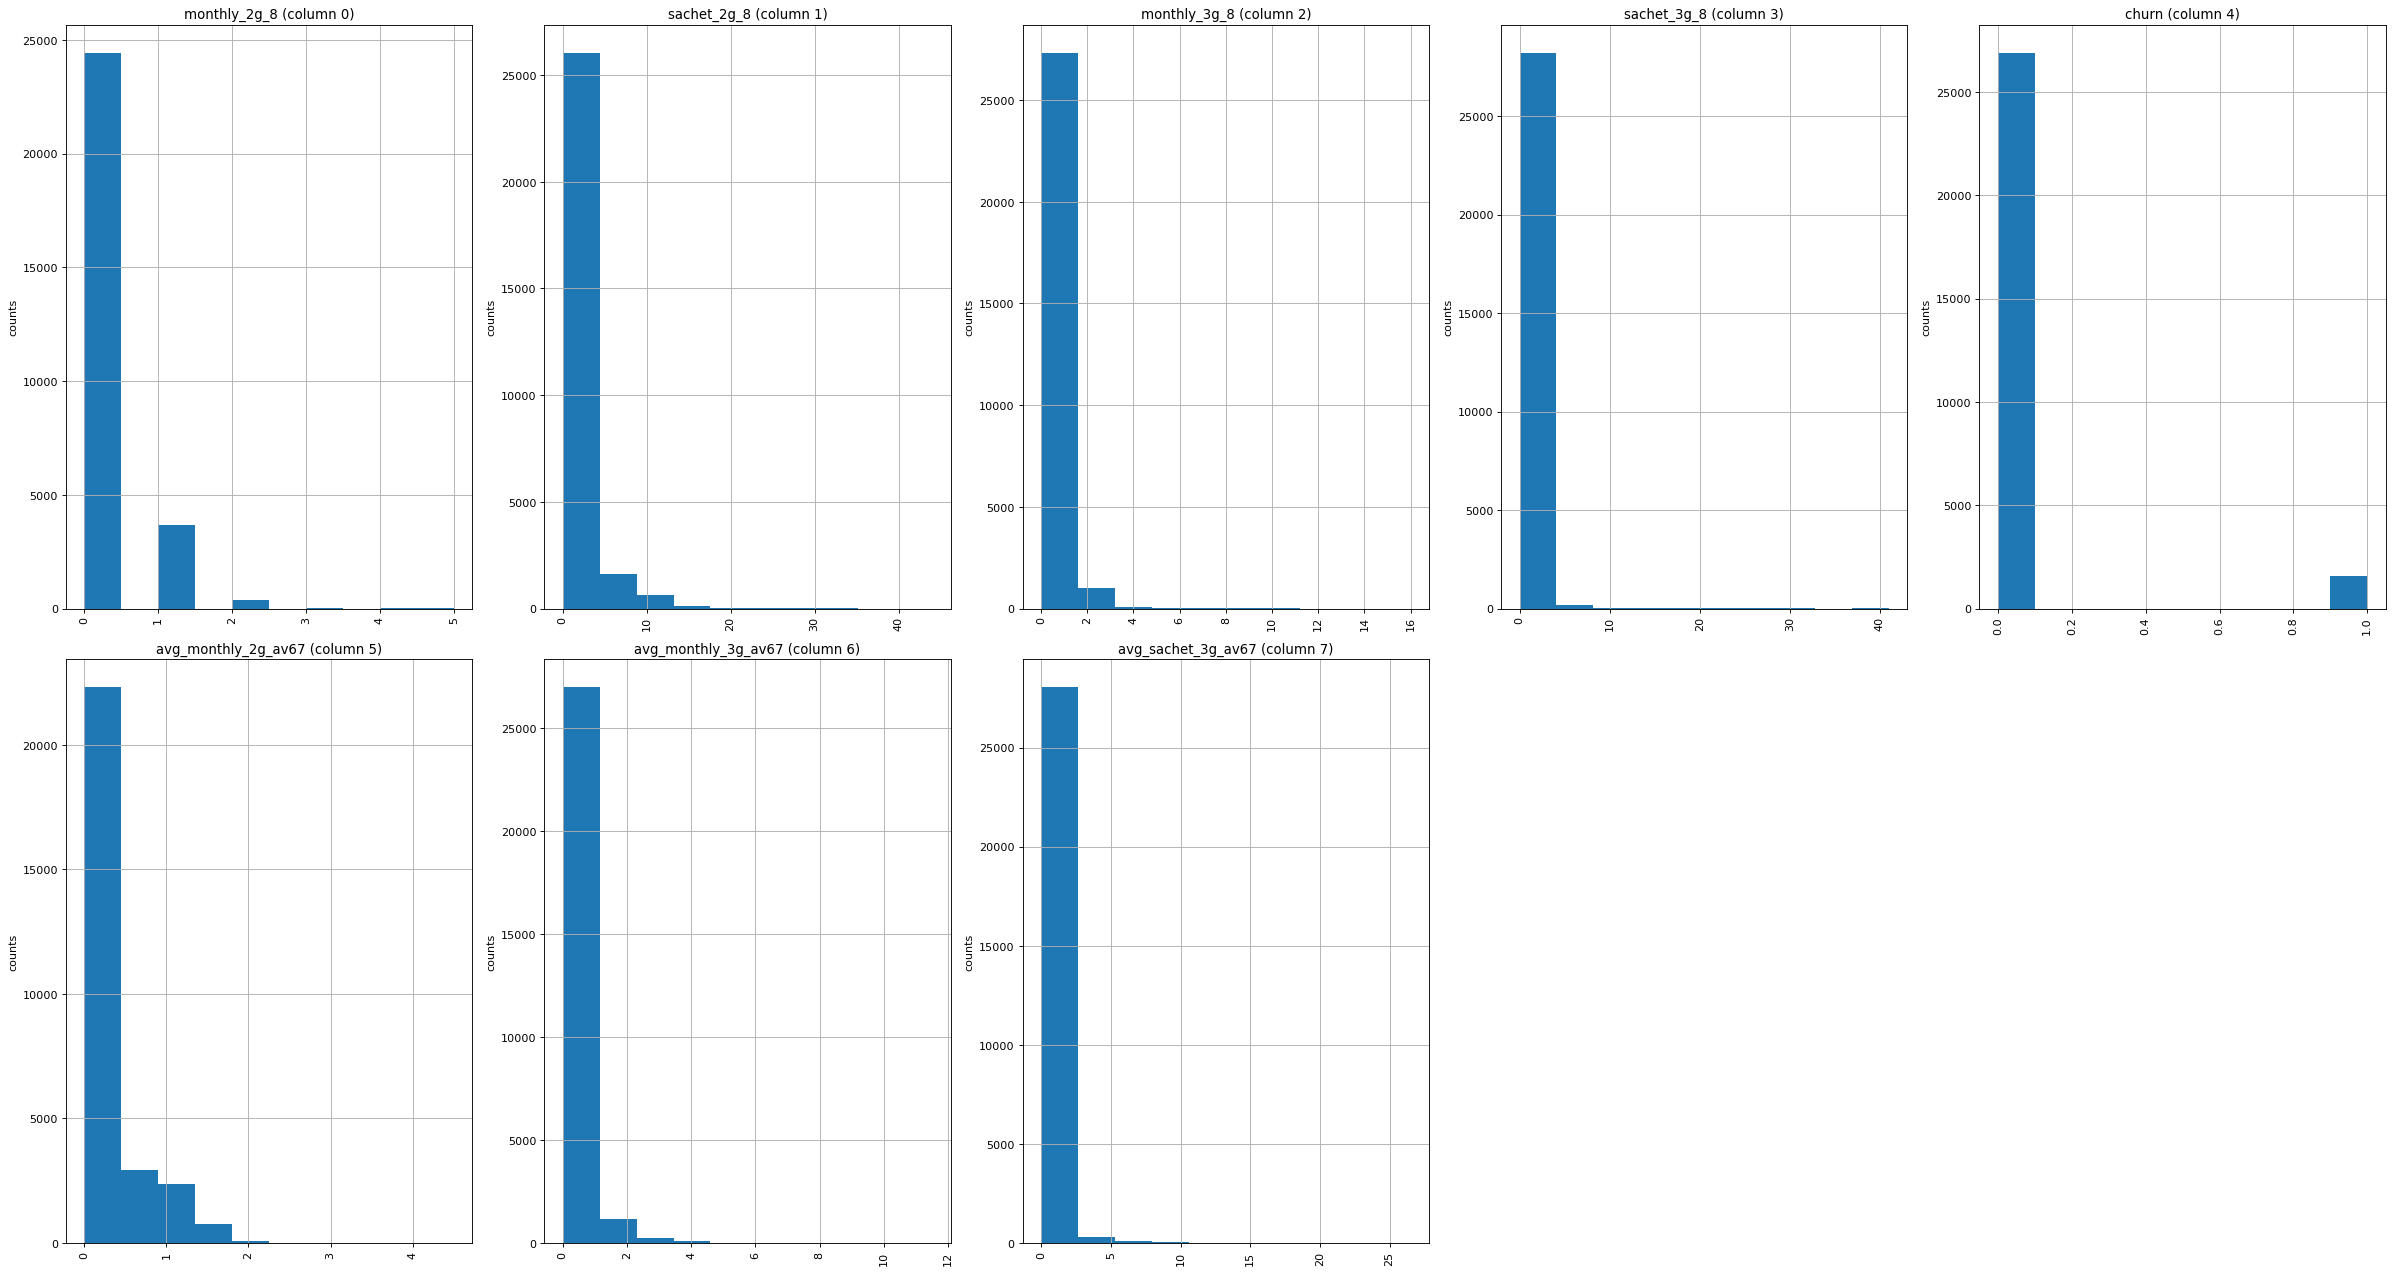

In [56]:
# lets again draw the plots with the updated dataset
plotPerColumnDistribution(telecom_hv_cust, 10, 5)

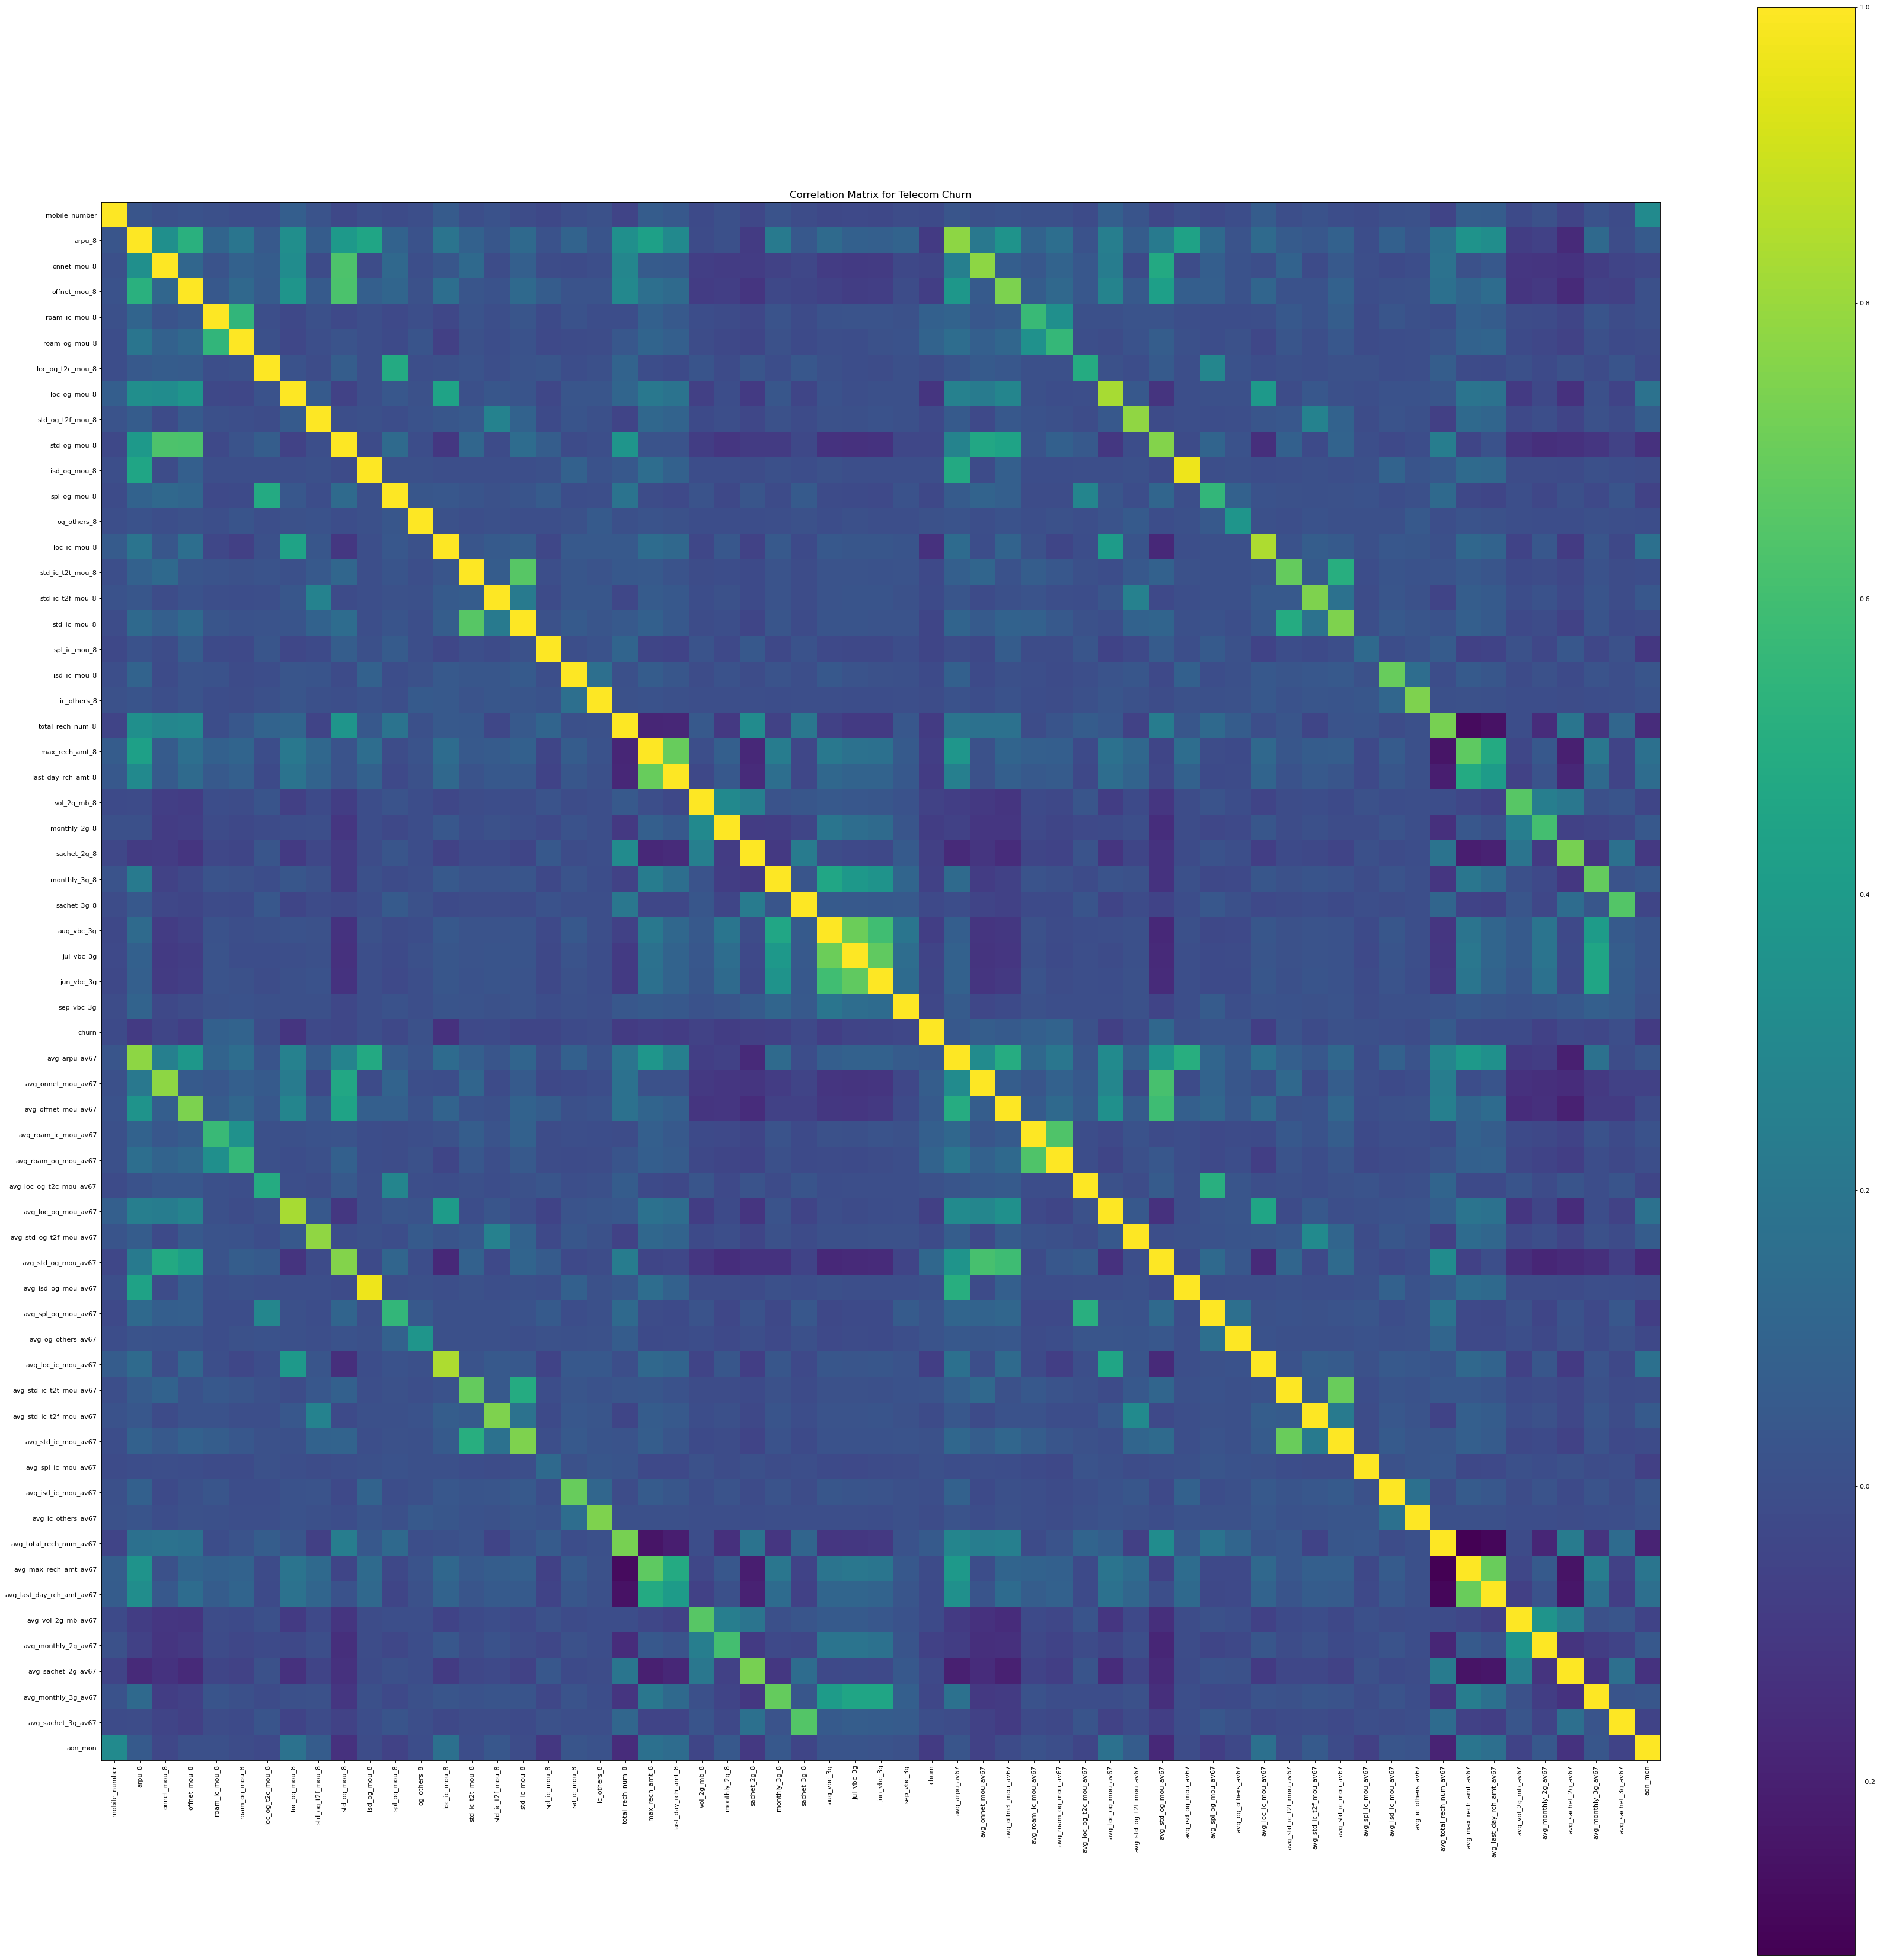

In [57]:
plotCorrelationMatrix(telecom_hv_cust, 53)

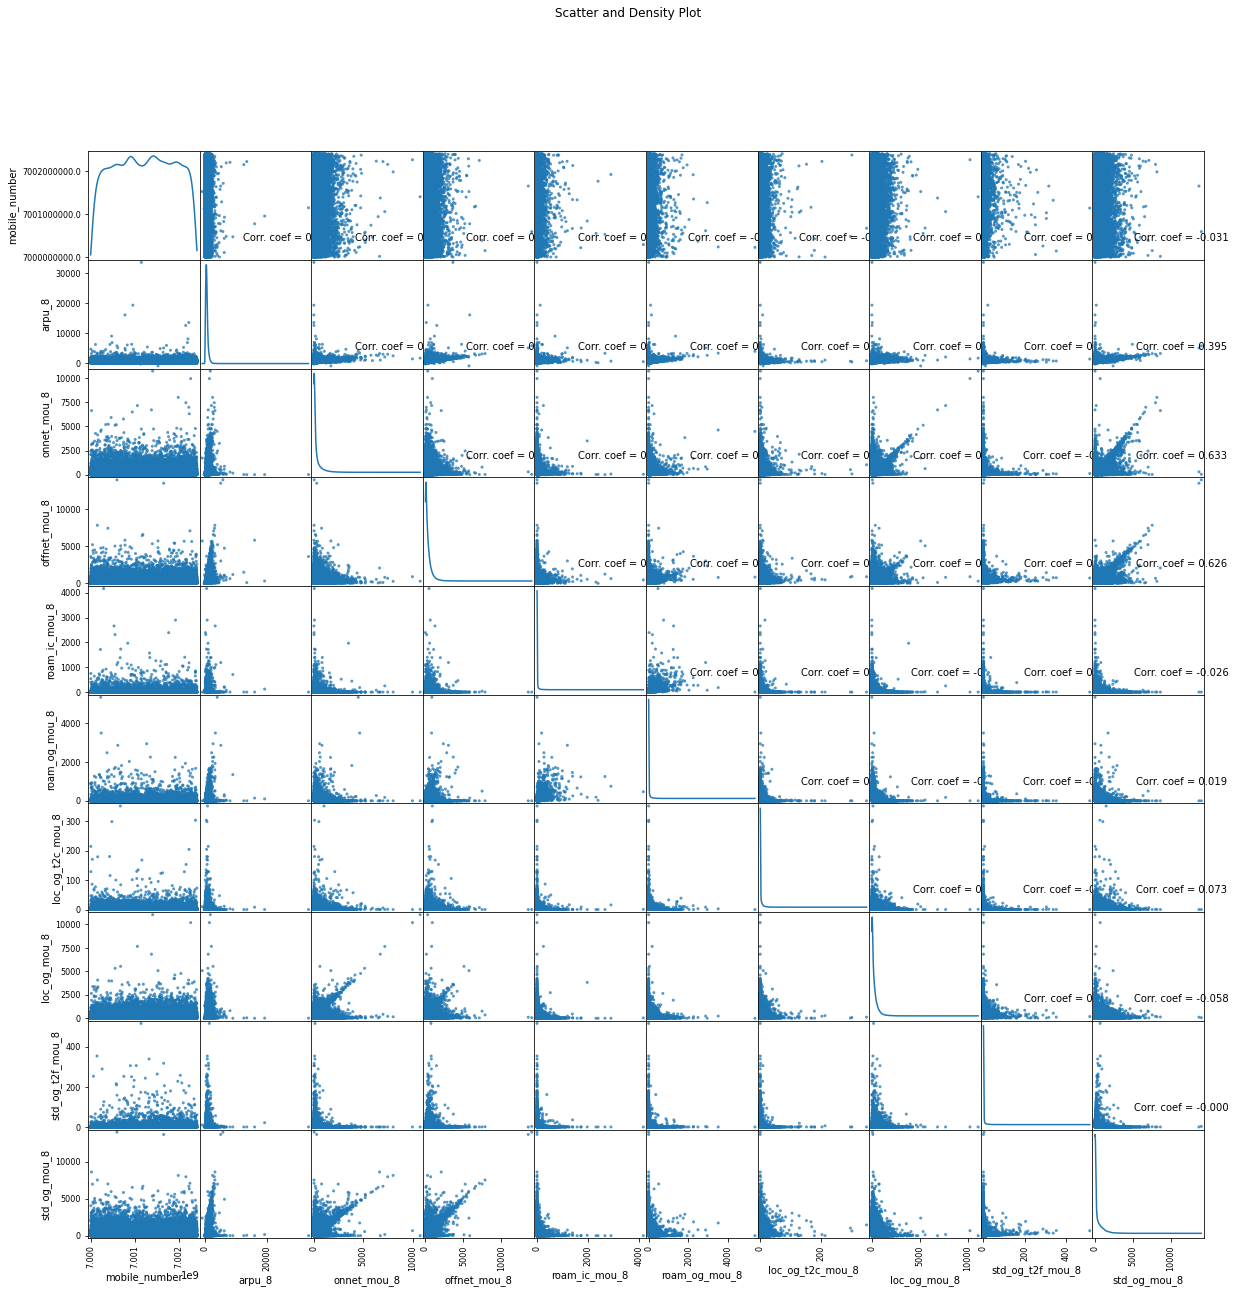

In [58]:
plotScatterMatrix(telecom_hv_cust, 20, 10)

Text(0.5, 1.0, 'Tenure Graph')

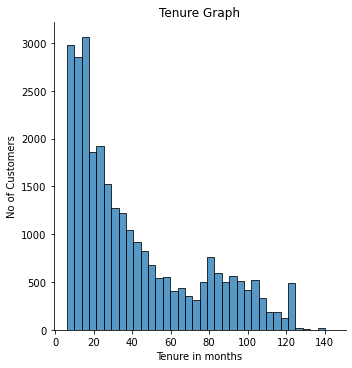

In [59]:
sns.displot(telecom_hv_cust['aon_mon'],  
             bins=int(180/5))
plt.ylabel('No of Customers')
plt.xlabel('Tenure in months')
plt.title('Tenure Graph')

<AxesSubplot:>

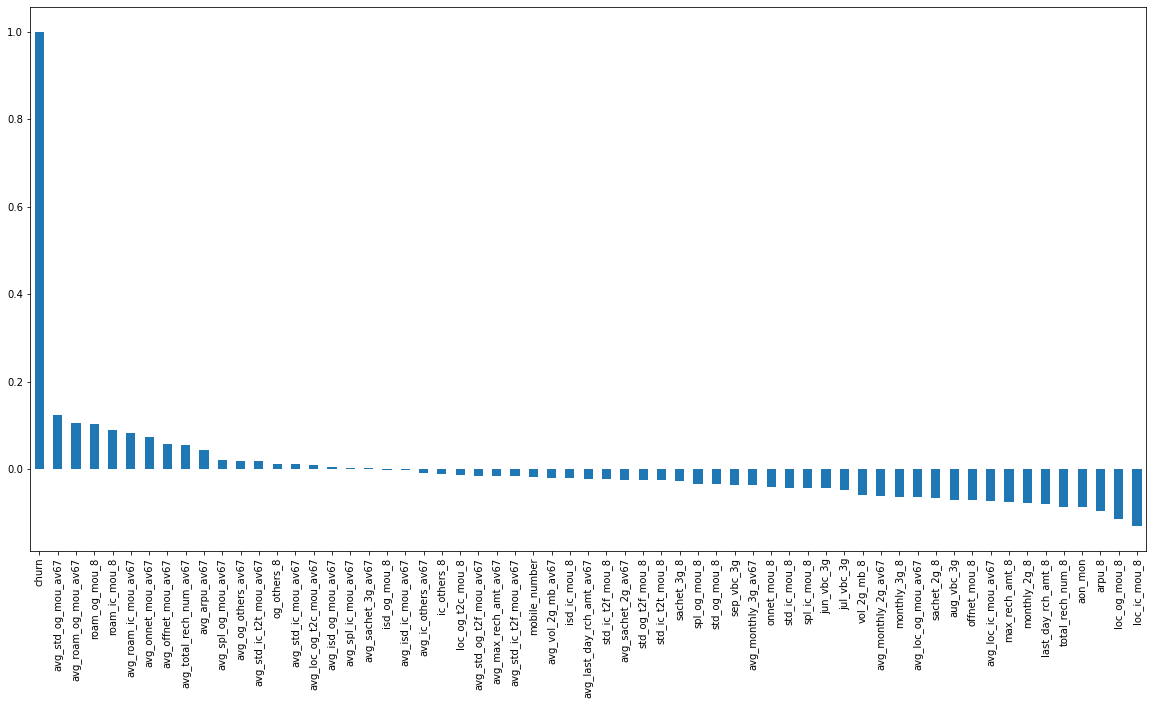

In [60]:
# lets check correlation of churn with other columns
plt.figure(figsize=(20,10))
telecom_hv_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

Observations : 
1. Average outgoing calls and outbound calls for the sixth and seventh months have a favourable correlation with churn.
2. Average Revenue and Recharge Number for the Eighth Month Have a Negative Relationship with Churn. 

<AxesSubplot:xlabel='total_rech_num_8', ylabel='arpu_8'>

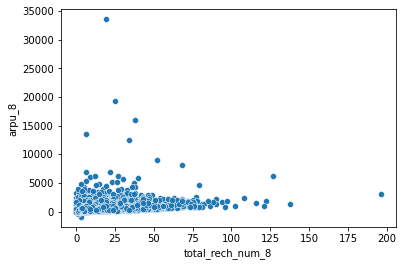

In [61]:
#  scatter plot between total recharge and avg revenue for the 8th month
sns.scatterplot(x = 'total_rech_num_8',y='arpu_8',data=telecom_hv_cust)

<AxesSubplot:xlabel='aon_mon', ylabel='avg_arpu_av67'>

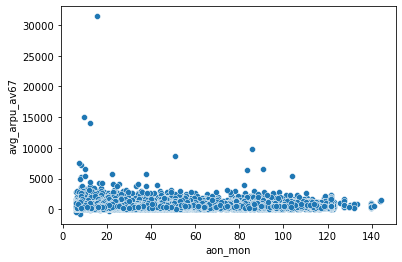

In [62]:
# plot between tenure and revenue
sns.scatterplot(x = 'aon_mon',y='avg_arpu_av67',data=telecom_hv_cust)

<AxesSubplot:xlabel='churn', ylabel='aon_mon'>

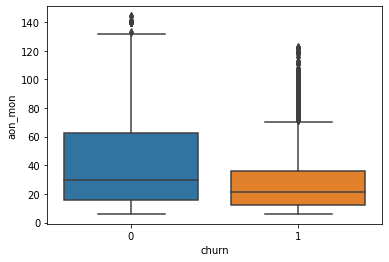

In [63]:
sns.boxplot(x = 'churn', y = 'aon_mon', data = telecom_hv_cust)

From the above plot , its clear tenured customers do not churn and they keep availing telecom services

Text(0.5, 1.0, 'Churn Vs Base Cost')

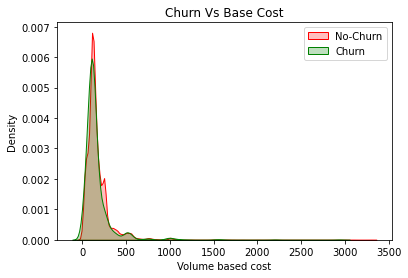

In [64]:
sns.kdeplot(telecom_hv_cust.avg_max_rech_amt_av67[(telecom_hv_cust["churn"] == 0)],
                color="Red", shade = True)
sns.kdeplot(telecom_hv_cust.avg_max_rech_amt_av67[(telecom_hv_cust["churn"] == 1)], color="Green", shade= True)
plt.legend(["No-Churn","Churn"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Volume based cost')
plt.title('Churn Vs Base Cost')

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

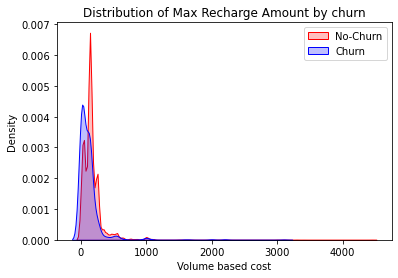

In [65]:
# churn vs max rechare amount
sns.kdeplot(telecom_hv_cust.max_rech_amt_8[(telecom_hv_cust["churn"] == 0)],
                color="Red", shade = True)
sns.kdeplot(telecom_hv_cust.max_rech_amt_8[(telecom_hv_cust["churn"] == 1)], color="Blue", shade= True)
plt.legend(["No-Churn","Churn"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Volume based cost')
plt.title('Distribution of Max Recharge Amount by churn')

# ***Data Preparation***

In [66]:
# we will create a new dataset for model building
df = telecom_hv_cust[:].copy()

df.drop('mobile_number', axis=1, inplace=True)
df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,...,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,aon_mon
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,...,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,...,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,...,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,...,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,20.133333
33,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,...,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,44.266667


In [67]:
# lets create X & y dataset for model building, X will obviously not have "churn" and y will only have "churn"
X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)

### ***Standardization***

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [69]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1,stratify=y)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (19952, 59)
Dimension of X_test: (8552, 59)


In [70]:
#HAndling Class Imblance 

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [71]:
y_tr.value_counts(normalize=True)

0    0.5
1    0.5
Name: churn, dtype: float64

# ***Model Building***

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
lr = LogisticRegression(max_iter=1000)

# lets RFE select 15 most imp features for us
rfe = RFE(estimator = lr, n_features_to_select=15)   
rfe = rfe.fit(X_tr, y_tr)

In [73]:
rfe_features = list(df.columns[rfe.support_])
print("15 most important features selected by RFE ", rfe_features)

15 most important features selected by RFE  ['arpu_8', 'loc_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_ic_others_av67', 'avg_total_rech_num_av67']


In [74]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

### ***Model 1***

In [75]:
lr_rfe = LogisticRegression(random_state=1)
lr_rfe.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [76]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr_rfe.predict(X_test_rfe)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy on the test dataset:',lr_rfe.score(X_test_rfe, y_test))

[[6288 1785]
 [  93  386]]
Accuracy on the test dataset: 0.7804022450888681


In [77]:
# lets check classification report on the test dataset
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      8073
           1       0.18      0.81      0.29       479

    accuracy                           0.78      8552
   macro avg       0.58      0.79      0.58      8552
weighted avg       0.94      0.78      0.84      8552



Conclusion using the above model:
- About 78% of the model is accurate.
- High false positive rates are shown by the confusion matrix, which is not desirable.


### ***Dimensionality Reduction***

In [78]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# apply PCA on train data
X_pca = pca.fit_transform(X_tr)
print(X_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(37670, 59)
(8552, 59)


### ***Model 2***

In [79]:
lr_pca = LogisticRegression(max_iter=500)
lr_pca.fit(X_pca, y_tr)

# make the predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [80]:
# Printing confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",metrics.accuracy_score(y_test,y_pred))

[[6411 1662]
 [  89  390]]
Accuracy of the logistic regression model with PCA:  0.7952525724976613


In [81]:
col = list(df.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,0.208173,0.155220,0.133751,arpu_8
1,0.097696,0.187098,-0.076239,onnet_mou_8
2,0.163002,0.196171,0.011369,offnet_mou_8
3,0.384484,-0.289900,-0.105173,roam_ic_mou_8
4,0.354767,-0.176906,-0.117944,roam_og_mou_8
5,0.010696,0.063210,-0.002417,loc_og_t2c_mou_8
6,0.060431,0.120226,0.160276,loc_og_mou_8
7,0.042112,0.018701,0.084651,std_og_t2f_mou_8
8,0.100666,0.248615,-0.128647,std_og_mou_8
9,0.045908,0.042378,0.062660,isd_og_mou_8


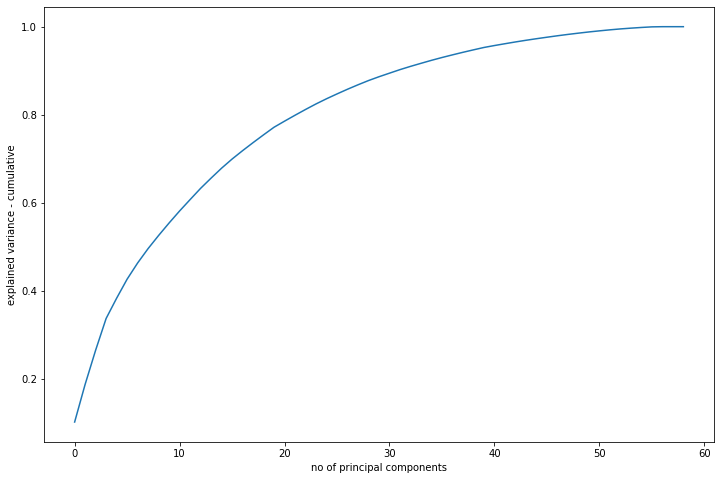

In [82]:
#  plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [83]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# 33 columns explains 90% of the variance, lets apply PCA with 33 components

array([10.25, 18.8 , 26.55, 33.76, 38.35, 42.68, 46.35, 49.62, 52.6 ,
       55.44, 58.16, 60.74, 63.29, 65.62, 67.87, 69.94, 71.84, 73.66,
       75.43, 77.16, 78.54, 79.88, 81.19, 82.45, 83.62, 84.72, 85.78,
       86.79, 87.75, 88.62, 89.43, 90.23, 90.97, 91.66, 92.34, 92.98,
       93.58, 94.16, 94.72, 95.26, 95.7 , 96.11, 96.51, 96.89, 97.25,
       97.59, 97.92, 98.23, 98.52, 98.79, 99.04, 99.27, 99.48, 99.66,
       99.82, 99.95, 99.99, 99.99, 99.99])

In [84]:
# PCA with 33 components
pca_33 = PCA(n_components=33)

df_tr_pca_33 = pca_33.fit_transform(X_tr)
print(df_tr_pca_33.shape)

df_test_pca_33 = pca_33.transform(X_test)
print(df_test_pca_33.shape)

(37670, 33)
(8552, 33)


### ***Model 3***

In [85]:
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_33, y_tr)

# Predicted probabilities
y_pred33 = lr_pca1.predict(df_test_pca_33)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred33)

print("Accuracy with 33 PCAs: ",metrics.accuracy_score(y_test,y_pred33))

Accuracy with 33 PCAs:  0.7957202993451824


In [86]:
print(metrics.confusion_matrix(y_test,y_pred33))

[[6429 1644]
 [ 103  376]]


Conclusions from the above model:

- Model has 80% Accuracy 33 features can explain 90% variance in the dataset most imp features:      arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8


### ***Model 4***

In [87]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.9719326383319968
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8073
           1       0.49      0.42      0.45       479

    accuracy                           0.94      8552
   macro avg       0.73      0.70      0.71      8552
weighted avg       0.94      0.94      0.94      8552



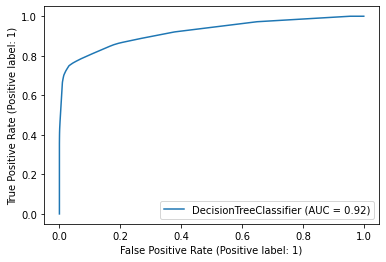

In [88]:
# Plot ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(intial_dt, X_train, y_train)
plt.show()


#### ***Hyperparameter Tuning***

In [89]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [90]:
grid_search.best_score_

0.9486767155925394

In [91]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

In [92]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8073
           1       0.61      0.34      0.43       479

    accuracy                           0.95      8552
   macro avg       0.79      0.66      0.70      8552
weighted avg       0.94      0.95      0.94      8552



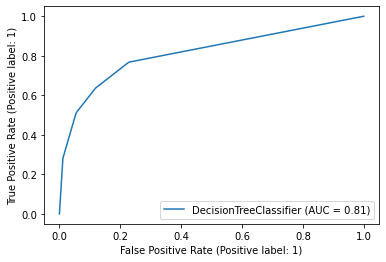

In [93]:
RocCurveDisplay.from_estimator(dt_best, X_train, y_train)
plt.show()

### ***Model 5***

Train accuracy : 0.9719326383319968
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8073
           1       0.66      0.25      0.36       479

    accuracy                           0.95      8552
   macro avg       0.81      0.62      0.67      8552
weighted avg       0.94      0.95      0.94      8552



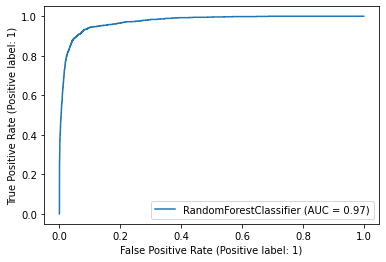

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

#### ***Hyperparameter Tuning***

In [95]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [96]:
grid_search.best_score_

0.9485763644892738

In [97]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=10,
                       n_jobs=-1, random_state=25)

In [98]:
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8073
           1       0.62      0.26      0.36       479

    accuracy                           0.95      8552
   macro avg       0.79      0.62      0.67      8552
weighted avg       0.94      0.95      0.94      8552



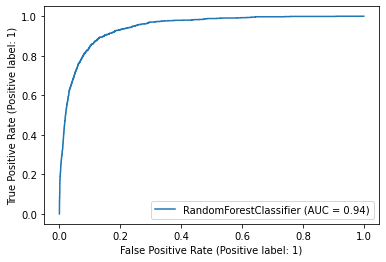

In [99]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

<AxesSubplot:>

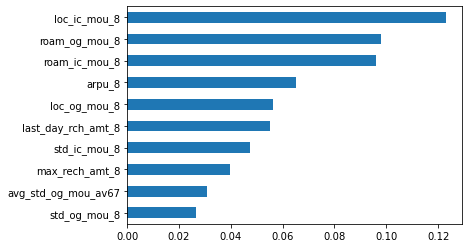

In [100]:
X = df
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = rf_best.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Conclusions from Random Forest

- The most significant predictor variables for predicting churn are Local Incoming for Month 8, Average Revenue Per Customer for Month 8, and Max Recharge Amount for Month 8. 



Overall Findings 
1. Revenue Per Customer and Standard Outgoing Calls are reliable measures of Churn.

2. The most crucial columns for predicting churn are local incoming and outgoing calls for the eighth month and average revenue for the eighth month.

3. Clients are more prone to churn if their duration is under 4 years.

4. Max Recharge Amount is a reliable indicator of churn.

5. The best prediction outcomes were produced by Random Forest. 